## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
# Display the data table for preview

mice_combo_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mice_combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_combo_df["Mouse ID"].count()

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = mice_combo_df[mice_combo_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mice_combo_df.drop_duplicates("Mouse ID")
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].count()

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mice.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,249.000000,249.000000,249.0,249.0,249.0
mean,12.730924,26.116466,0.0,45.0,0.0
std,7.228687,3.697003,0.0,0.0,0.0
min,1.000000,15.000000,0.0,45.0,0.0
25%,6.000000,25.000000,0.0,45.0,0.0
50%,13.000000,27.000000,0.0,45.0,0.0
75%,19.000000,29.000000,0.0,45.0,0.0
max,24.000000,30.000000,0.0,45.0,0.0


In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

mean = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_sum = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, "SEM": sem})
stats_sum

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [13]:
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [18]:
clean_mice["Timepoint"].count()

249

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

In [19]:
drug_data = pd.DataFrame(clean_mice.groupby(["Drug Regimen"]).count()). reset_index()

drug_df = drug_data[["Drug Regimen", "Timepoint"]]
drug_df = drug_df.set_index("Drug Regimen")

drug_df

,Timepoint
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


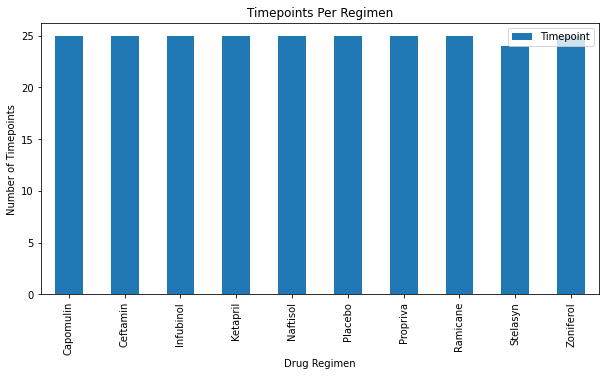

<Figure size 432x288 with 0 Axes>

In [21]:
drug_df.plot(kind= "bar", figsize=(10,5))

plt.title("Timepoints Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()
plt.tight_layout()

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

In [22]:
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


Text(0, 0.5, 'Number of Timepoints')

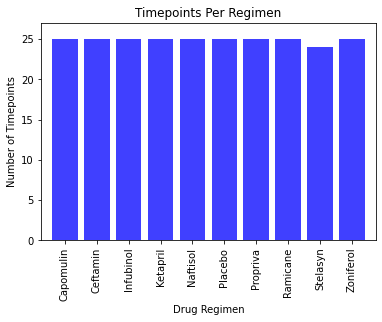

In [41]:
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
tp = [25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 25.0]
                
x_axis = np.arange(len(tp))
plt.bar(x_axis, tp, color="b", alpha= 0.75, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation = "vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(tp)+2)

plt.title("Timepoints Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

In [51]:
sex_group = clean_mice.groupby(["Mouse ID", "Sex"])

sex_group_df = pd.DataFrame(sex_group.size())

In [53]:
sex_stats = pd.DataFrame(sex_group_df.groupby(["Sex"]).count())
sex_stats.columns = ["Total Count"]

sex_stats["Percentage of Sex"] = (100*(sex_stats["Total Count"]/
                                  sex_stats["Total Count"].sum()))

sex_stats["Percentage of Sex"] = sex_stats["Percentage of Sex"]

sex_stats

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


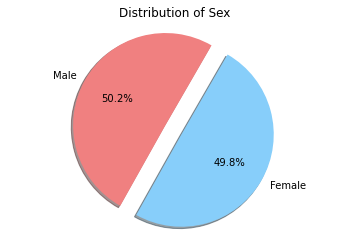

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = (125, 124)
sex = ["Male", "Female"]
colors = ["lightcoral", "lightskyblue"]
explode= (0, 0.2)

plt.title("Distribution of Sex")
plt.pie(count, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=60)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

In [64]:
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [68]:
van_mousing = clean_mice[clean_mice["Drug Regimen"].isin(["Capomulin", 
                                   "Ramicane", "Infubinol", "Ceftamin" ])]
van_mousing = van_mousing.sort_values(["Timepoint"], ascending = True)

van_mousing

van_mousing_data = van_mousing[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
van_mousing_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1123,Ceftamin,l661,0,45.0
1120,Ceftamin,l558,0,45.0
1113,Ceftamin,l490,0,45.0
1103,Ceftamin,l471,0,45.0
...,...,...,...,...
273,Capomulin,l897,0,45.0
263,Ramicane,d251,0,45.0
255,Ramicane,q610,0,45.0
341,Capomulin,v923,0,45.0


In [77]:
franken_mouse = mice_combo_df[mice_combo_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

franken_mouse = franken_mouse.sort_values(["Timepoint"], ascending = True)

franken_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1391,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1370,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [78]:
franken_mouse_data = franken_mouse [["Drug Regimen", "Mouse ID", 
                                     "Timepoint", "Tumor Volume (mm3)"]]

franken_mouse_data 

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

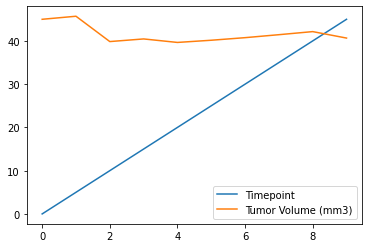

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

time_vs_tumer = mice_combo_df[mice_combo_df["Mouse ID"].isin(["v923"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

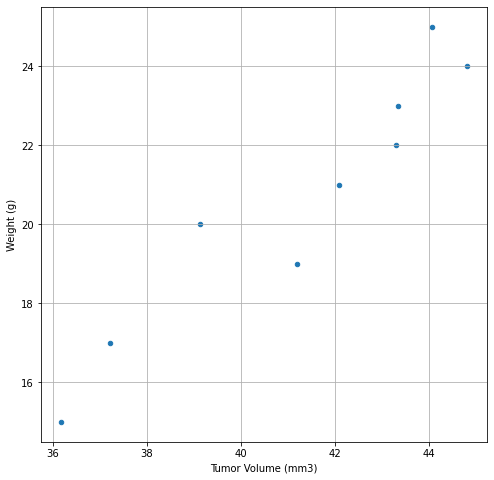

In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_scatter = mice_combo_df[mice_combo_df["Drug Regimen"].isin(["Capomulin"])]

cap_scatter_df = franken_mouse[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

cap_scatter_plot = cap_scatter.reset_index()

cap_grouped_weight = cap_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

cap_grouped_plot = pd.DataFrame(cap_grouped_weight).reset_index()

capomulin_scatter = cap_grouped_plot.plot(kind='scatter', x='Tumor Volume (mm3)', y='Weight (g)', grid = True, figsize= (8,8))

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
